In [806]:
import numpy as np
import matplotlib.pyplot as plt


#### Función de vecindad

In [807]:
def vecindad(i, winner, sigma):
    '''
    Recibo el índice de la neurona en cuestión, el índice de la neurona ganadora y la desviación
    estándar (sigma) a utilizar para
    la función de vecindad
    '''

    v = np.exp(-0.5*((i-winner)/sigma)**2)
    return v



#### Datos y parámetros

In [808]:
N_in = 2
N_out = 10

lr = 0.05

#### Inicialización de pesos

In [809]:
seed=4
np.random.seed(seed)

#No hace falta restringir la norma de los vectores w
w = np.random.normal(loc=0, scale=0.1, size=(N_out, N_in))

#### Entradas

In [810]:
p = 10000
c = 0

inp = np.zeros(shape=(p, N_in))

r1 = 0.9
r2 = 1.1

while (c<p): #hasta tener la cantidad de entradas que deseo
    x = np.random.rand()*2*r2 - r2 #(-r2, r2)
    y = np.random.rand()*r2 #[0, r2)
    
    r = np.sqrt(x**2 + y**2)

    if(r > r1 and r < r2):
        inp[c, :] = [x, y]
        c += 1    

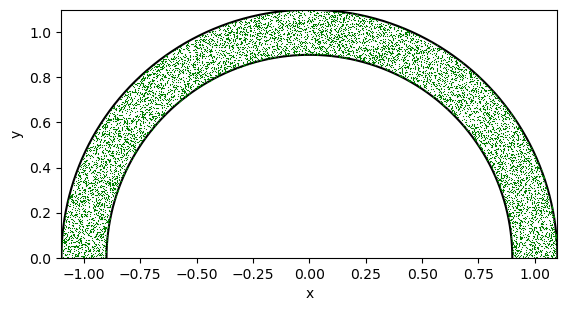

In [811]:
#Límites de la distribución
theta = np.linspace(0, np.pi, 100)

x1 = r1 * np.cos(theta)
y1 = r1 * np.sin(theta)

x2 = r2 * np.cos(theta)
y2 = r2 * np.sin(theta)



fig, ax = plt.subplots()

ax.plot(x1, y1, 'k')
ax.plot(x2, y2, 'k')
ax.plot(inp[:, 0], inp[:, 1], '*', color  = 'g', markersize = '0.2')
ax.set_aspect('equal')
ax.set_xlim(-r2, r2)
ax.set_ylim(0, r2)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()




#### Red de Kohonen

In [812]:
#Registro los vectores wi con el paso del tiempo para luego graficar (p+1 pasos de tiempo)
reg_wi_x = np.zeros(shape=(p+1, N_out))
reg_wi_y = np.zeros(shape=(p+1, N_out))

for i in range(N_out):
    reg_wi_x[0, i] = w[i,0]
    reg_wi_y[0, i] = w[i,1]

for mu in range(p):

    sigma = 10/(mu+1)**(1/3)

    #Salida
    v = np.dot(w, inp[mu])

    #índice de la neurona ganadora
    win = np.argmax(v)

    #Corrección para cada vector w_i
    for i in range(N_out):
        deltaWi = lr*vecindad(i, win, sigma)*(inp[mu] - w[i,:])
        w[i,:] += deltaWi

        
        reg_wi_x[mu+1, i] = w[i,0]
        reg_wi_y[mu+1, i] = w[i,1]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


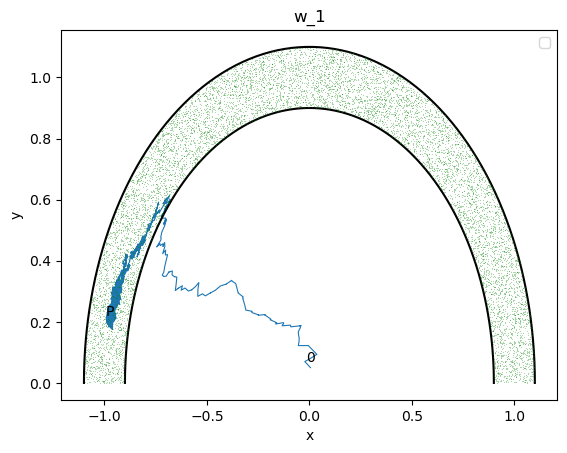

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


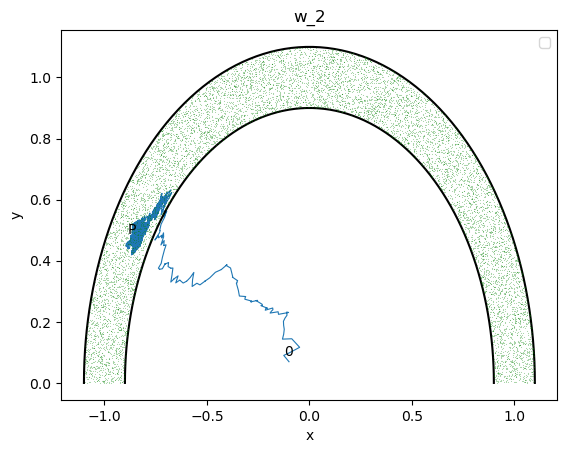

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


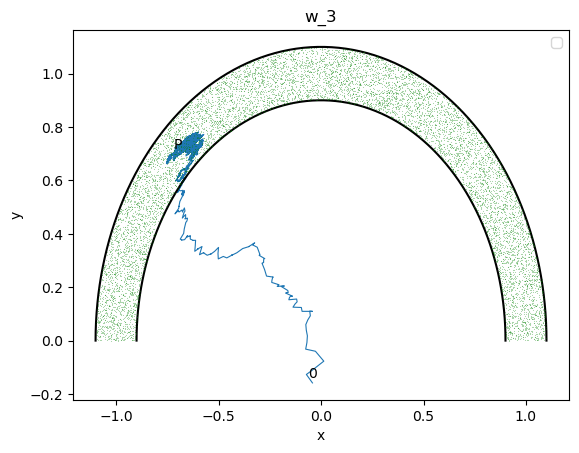

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


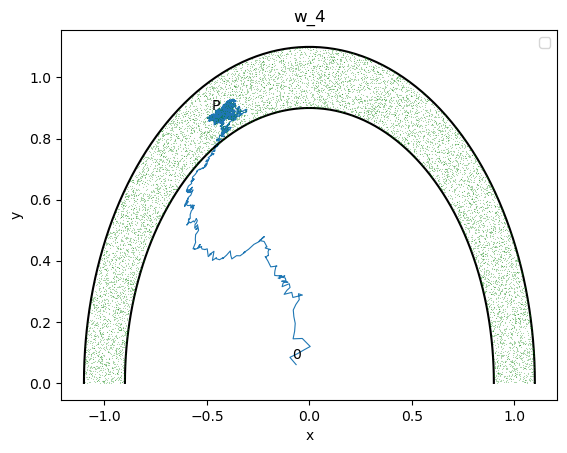

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


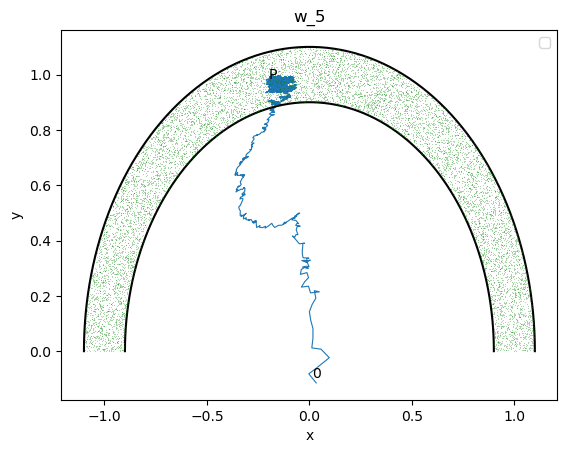

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


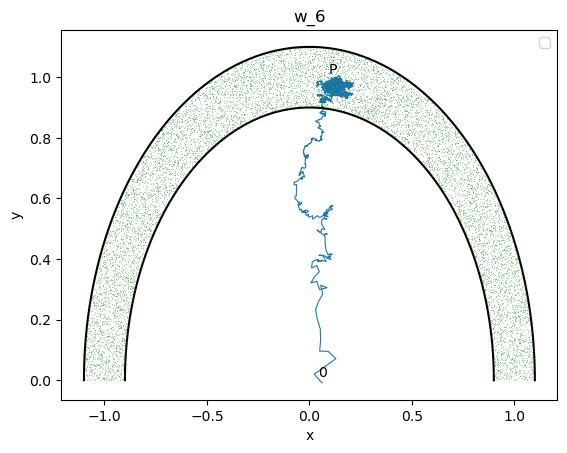

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


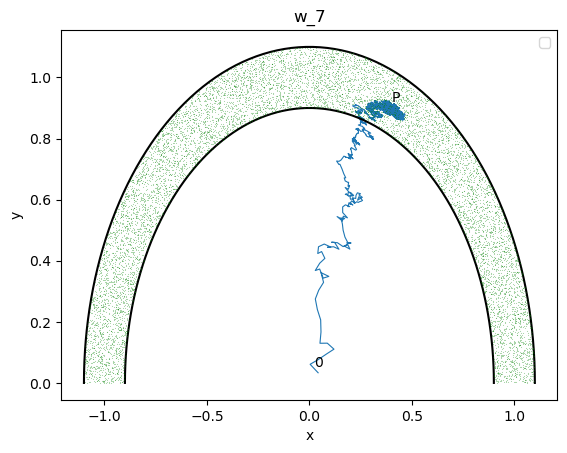

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


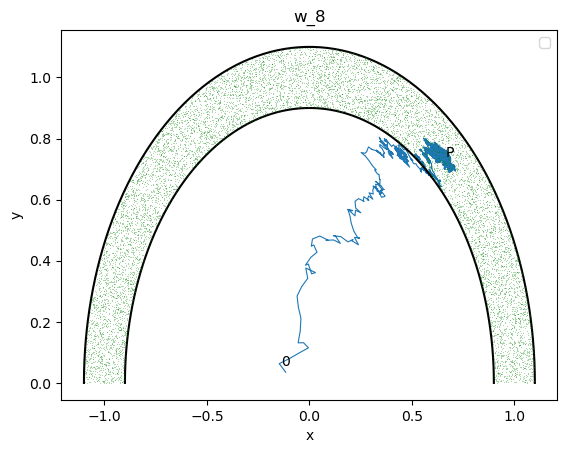

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


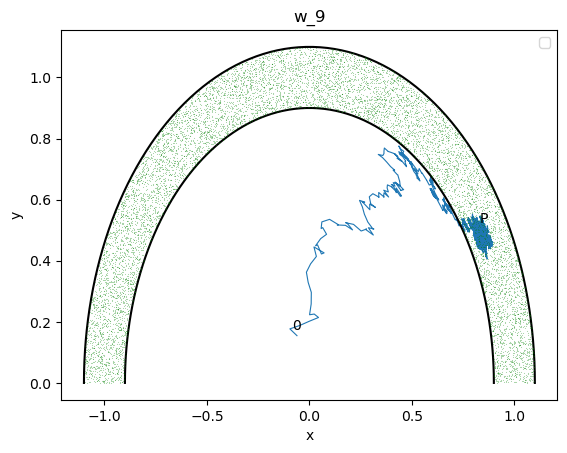

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


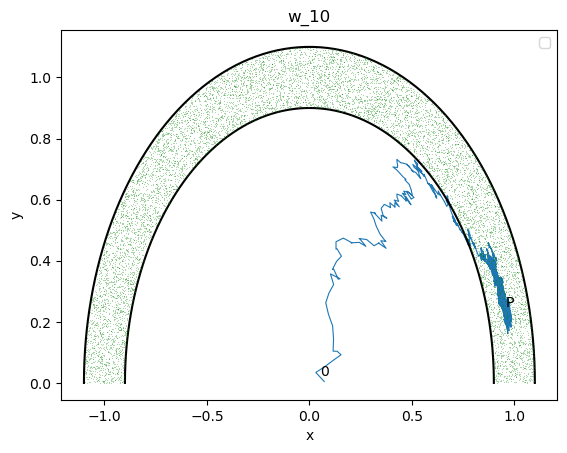

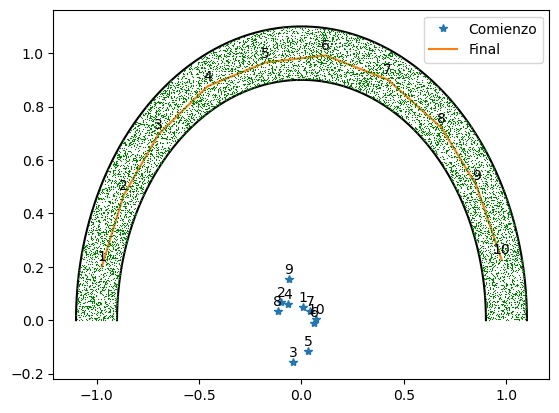

In [817]:
#Muestro la evolución de cada vector w_i
for i in range(N_out):
    plt.plot(reg_wi_x[:,i], reg_wi_y[:,i], linewidth = "0.8")
    plt.text(reg_wi_x[0, i], reg_wi_y[0, i] + 0.02, str('0'), ha='center')
    plt.text(reg_wi_x[-1, i], reg_wi_y[-1, i] + 0.02, str('P'), ha='center')
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x1, y1, 'k')
    plt.plot(x2, y2, 'k')
    plt.plot(inp[:, 0], inp[:, 1], '*', color = 'g', markersize = '0.05')
    plt.title("w_"+str(i+1))
    plt.show()
        


#Muestro la posición inicial y final de cada w_i
for i in range(10):
    plt.text(reg_wi_x[0, i], reg_wi_y[0, i] + 0.02, str(i + 1), ha='center')
    plt.text(reg_wi_x[-1, i], reg_wi_y[-1, i] + 0.02, str(i + 1), ha='center')
plt.plot(reg_wi_x[0,:], reg_wi_y[0,:], '*', label = "Comienzo")
plt.plot(reg_wi_x[-1,:], reg_wi_y[-1,:], label = "Final")
plt.plot(x1, y1, 'k')
plt.plot(x2, y2, 'k')
plt.plot(inp[:, 0], inp[:, 1], '*', color = 'g', markersize = '0.2')
plt.legend()
plt.show()